In [1]:
import pandas as pd
import numpy as np
import pylab as plt

Set the global default size for matplotlib figures.<br>
Set the size of matlplotlib figures that contain subplots<br>
Set the size of matplotlib histogram bins

In [2]:
plt.rc('figure', figsize=(10,15))
figsize_with_subplots = (10,10)
bin_size = 10

### Explore the Data <br>
Read the data:

In [3]:
df_train = pd.read_csv("/Users/lydia/Projects/data-science-ipython-notebooks/data/titanic/train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Type 'object' is a string for pandas, which poses problems with machine learning algorithms. If we want to use these as features, we'll need to convert these to number representations.
Get some basic information on the DataFrame:

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Ideally all of these counts should be alike. Some data is missing in Age, Cabin, and Embarked.

In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Plot some basic features: <br>
Set up a grid of plots:

In [8]:
fig = plt.figure(figsize=figsize_with_subplots)
fig_dims = (3,2)

<Figure size 1000x1000 with 0 Axes>

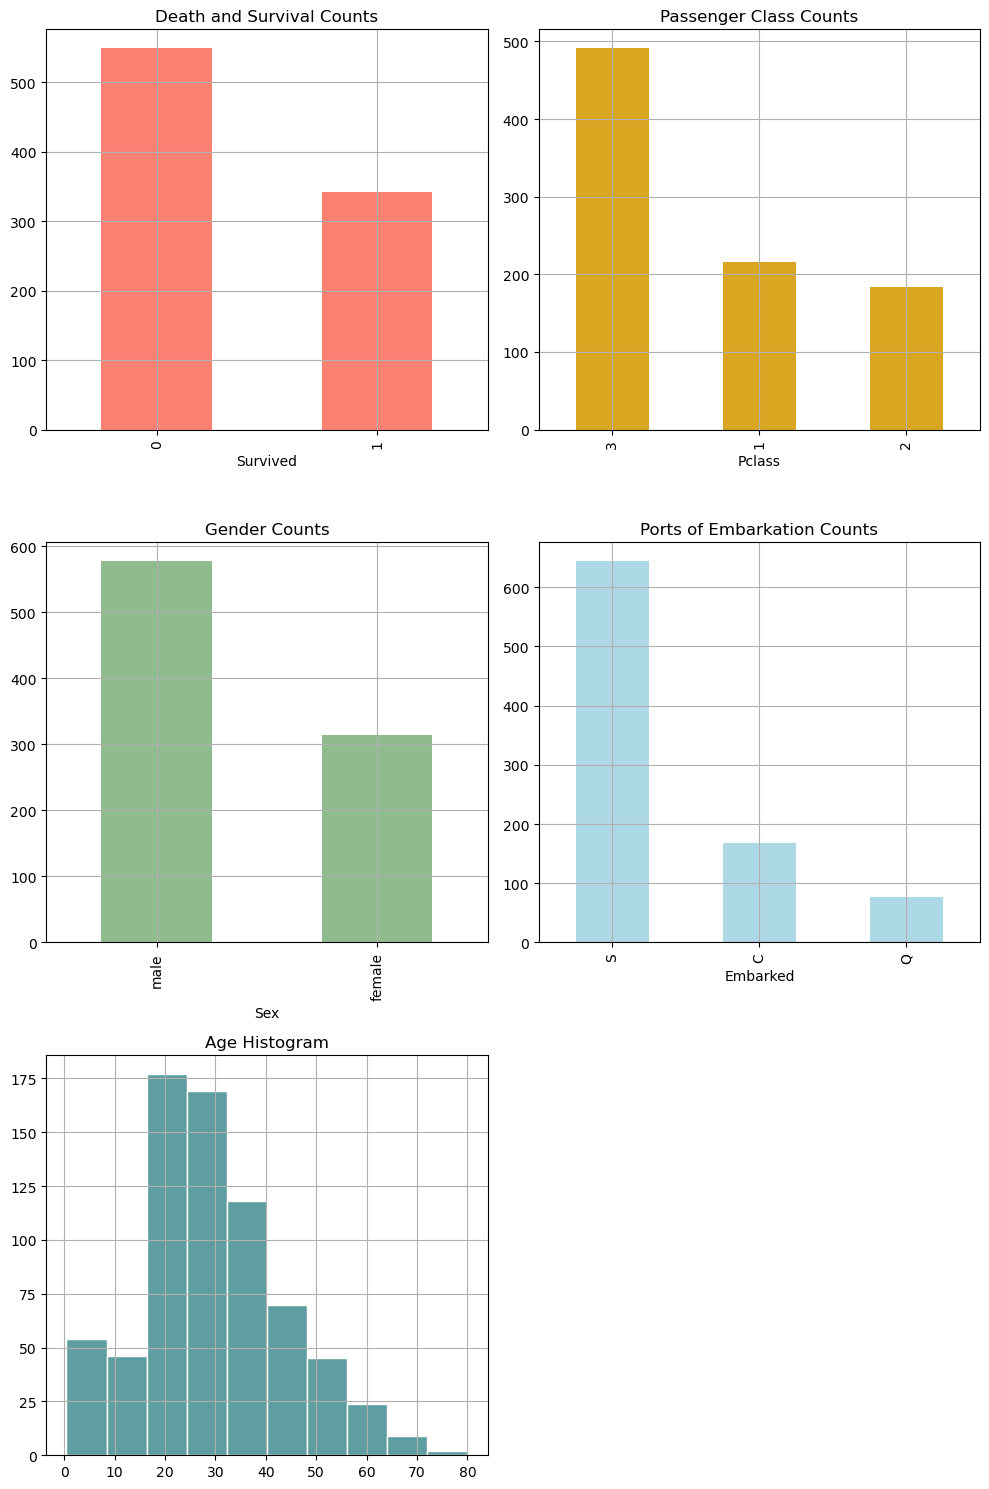

In [9]:
# Plot death and survival counts
plt.subplot2grid(fig_dims, (0,0))
df_train['Survived'].value_counts().plot(kind='bar', 
                                        title='Death and Survival Counts',
                                        color='salmon')
plt.grid()
plt.tight_layout()

# Plot Pclass counts
plt.subplot2grid(fig_dims, (0,1))
df_train['Pclass'].value_counts().plot(kind='bar', 
                                      title='Passenger Class Counts',
                                      color='goldenrod')
plt.grid()
plt.tight_layout()

#Plot Sex counts
plt.subplot2grid(fig_dims, (1,0))
df_train['Sex'].value_counts().plot(kind='bar',
                                   title='Gender Counts',
                                   color='darkseagreen')
plt.grid()
plt.tight_layout()

#Plot of Embarked counts
plt.subplot2grid(fig_dims, (1,1))
df_train['Embarked'].value_counts().plot(kind='bar',
                                        title='Ports of Embarkation Counts',
                                        color='lightblue')
plt.grid()
plt.tight_layout()

#Plot the Age histogram
plt.subplot2grid(fig_dims, (2,0))
df_train['Age'].hist(color='cadetblue', 
                     edgecolor='white')
plt.title('Age Histogram')
plt.tight_layout()

At first this looked really wrong and I had to remove cumulative = True which was skewing the age.

### Feature: Travel Class

Cross train the data: Proportion of survival based on passenger class. Generate a cross tab of Pclass and Survived:

pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt

In [10]:
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0, 0.5, 'Survival Rate')

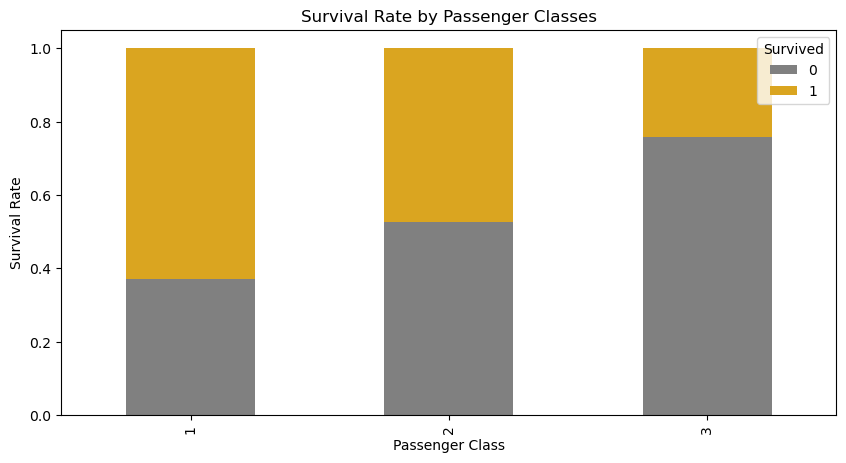

In [11]:
plt.rcParams["figure.figsize"] = (10,5)
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar',
                  stacked='True',
                  title='Survival Rate by Passenger Classes',
                  color=['gray', 'goldenrod'])

plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')


As expected, first class has best rate of survival.

### Feature: Sex Class <br>
Generate cross tab for survival and sex. However, it is currently a string. 

In [12]:
sexes = sorted(df_train['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes)+1)))
genders_mapping

{'female': 0, 'male': 1}

In [13]:
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


sex_val_xt stands for sex value crosstab

<Axes: title={'center': 'Survival Rate by Gender'}, xlabel='Sex_Val'>

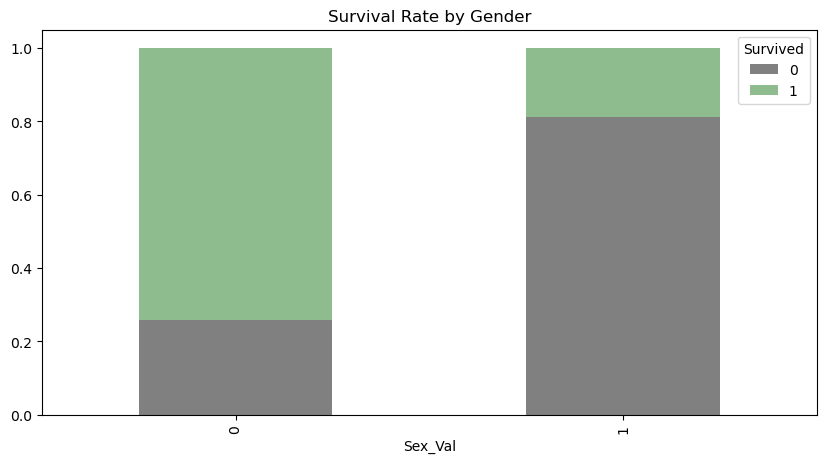

In [14]:
sex_val_xt = pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float), axis=0)
sex_val_xt_pct.plot(kind='bar', 
                    stacked=True, 
                    title='Survival Rate by Gender',
                    color=['gray', 'darkseagreen'])

Chivalry was alive and well, unlike the gentlemen who extended it. 

Crosstab Sex with Class:

In [15]:
passenger_classes = sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print('M: ', p_class, len(df_train[(df_train['Sex'] == 'male') &
                              (df_train['Pclass'] == p_class)]))
    print('F: ', p_class, len(df_train[(df_train['Sex'] == 'female') &
                              (df_train['Pclass'] == p_class)]))

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


Text(0, 0.5, 'Survival Rate')

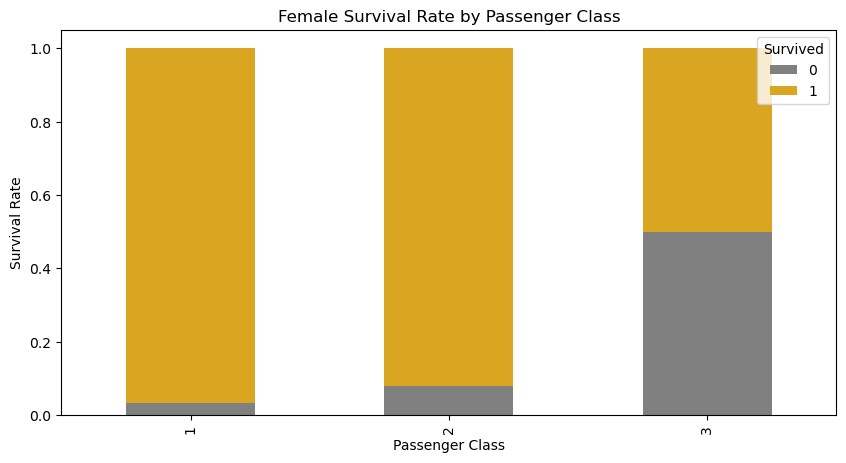

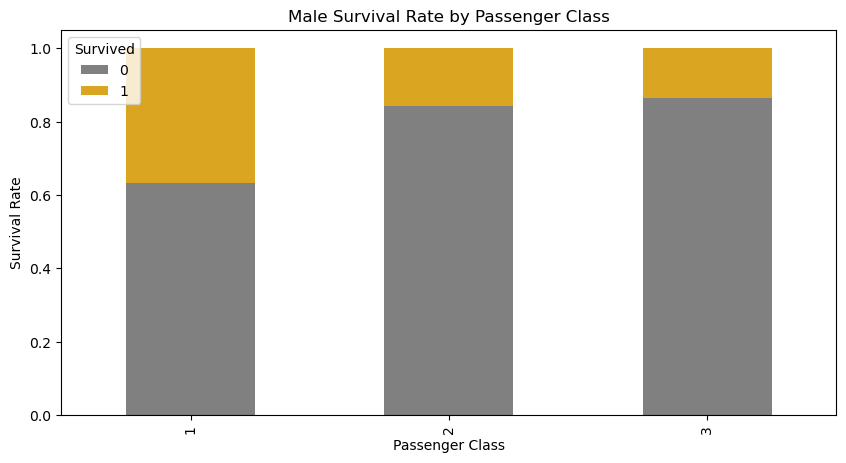

In [16]:
females_df = df_train[df_train['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], df_train['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar', 
                   stacked=True,
                   title='Female Survival Rate by Passenger Class',
                   color=['gray', 'goldenrod'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

males_df = df_train[df_train['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar',
                 stacked=True,
                 title='Male Survival Rate by Passenger Class',
                 color=['gray', 'goldenrod'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
                               

### Embarked <br>
The Embarked column is missing some data points<br>
As the majority of passengers embarked in 'S':3, it makes the most sense to assign the missing values to S.

In [17]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [18]:
df_train['Embarked'].fillna('S', inplace=True)

embarked_locs = sorted(df_train['Embarked'].unique())

embarked_locs_mapping = dict(zip(embarked_locs, range(len(embarked_locs))))

embarked_locs_mapping

/var/folders/fy/thq20n_j7rg3ycyq1v1s6gzh0000gp/T/ipykernel_52147/2238190028.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Embarked'].fillna('S', inplace=True)


{'C': 0, 'Q': 1, 'S': 2}

In [19]:
df_train['Embarked_Val'] = df_train['Embarked'].map(embarked_locs_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2


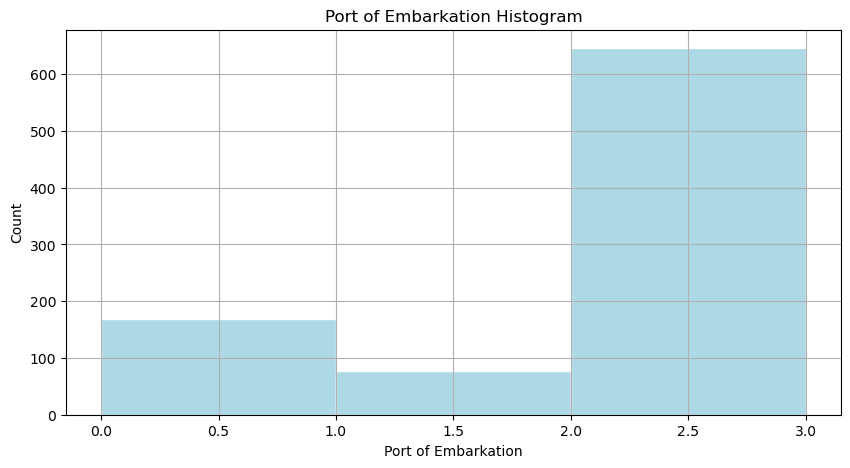

In [20]:
df_train['Embarked_Val'].hist(bins=len(embarked_locs), range=(0,3), color='lightblue', edgecolor='white')
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

Verify that the NaNs have successfully been addressed

In [21]:
embarked_locs = sorted(df_train['Embarked_Val'].unique())
embarked_locs

[0, 1, 2]

Text(0, 0.5, 'Survival Rate')

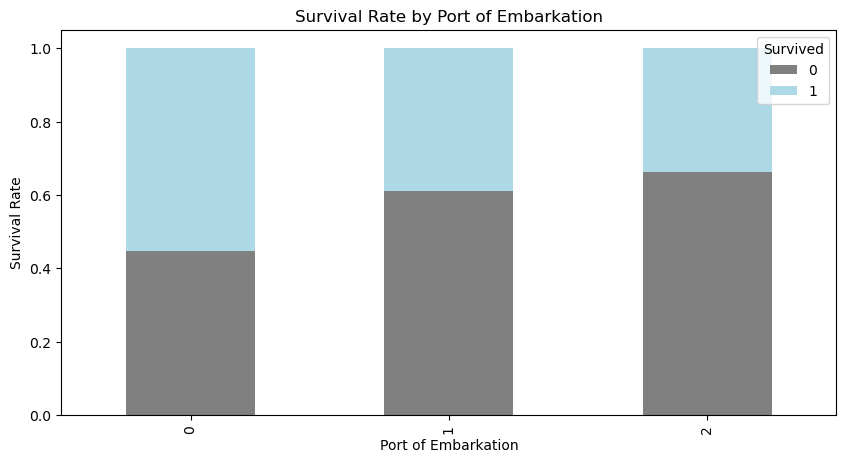

In [22]:
embarked_val_xt = pd.crosstab(df_train['Embarked_Val'], df_train['Survived'])
embarked_val_xt_pct =  embarked_val_xt.div(embarked_val_xt.sum(1).astype(float), axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True, color=['gray', 'lightblue'])
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')

One way to address ordering the Embarked values is with dummy variables like so: Although I made it raw becuse I did it another way. 

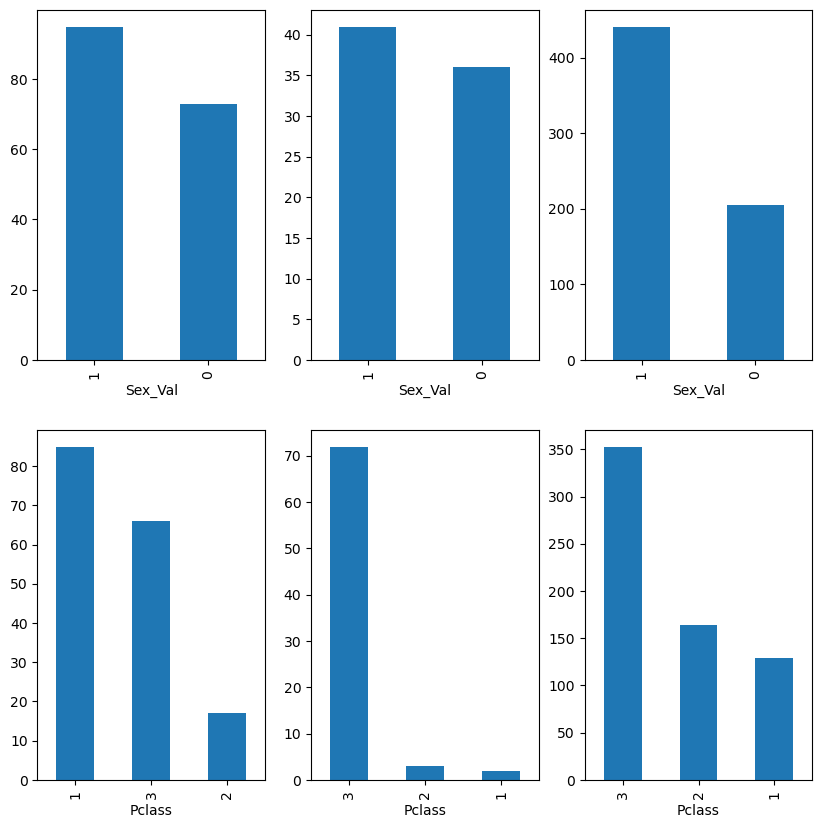

In [23]:
fig = plt.figure(figsize=figsize_with_subplots)

rows = 2 
cols = 3
col_names = ('Sex_Val', 'Pclass')

for portIdx in embarked_locs:
    for colIdx in range(0, len(col_names)):
        plt.subplot2grid((rows, cols), (colIdx, portIdx))
        df_train[df_train['Embarked_Val'] == portIdx][col_names[colIdx]].value_counts().plot(kind='bar')

Leaving Embarked as integers implies ordering in the values, which does not exist. Another way to represent Embarked without ordering is to create dummy variables:

### Feature: Age <br>
The Age column is missing quite a few values. Filter to view what is missing:

In [24]:
df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


Determine the Age typical for each passenger class by Sex_Val. We'll use the median instead of the mean because the Age histogram seems to be right skewed. To keep the Age intact I make a copy called AgeFill to work with. 

In [25]:
df_train['AgeFill'] = df_train['Age']

Populate AgeFill

In [26]:
df_train['AgeFill'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: AgeFill, dtype: float64

In [27]:
print(pd. __version__)

2.2.1


In [28]:
age_fill = df_train['AgeFill'].groupby([df_train['Sex_Val'], df_train['Pclass']]).apply(lambda x: x.fillna(x.median()))


Text(0, 0.5, 'Age')

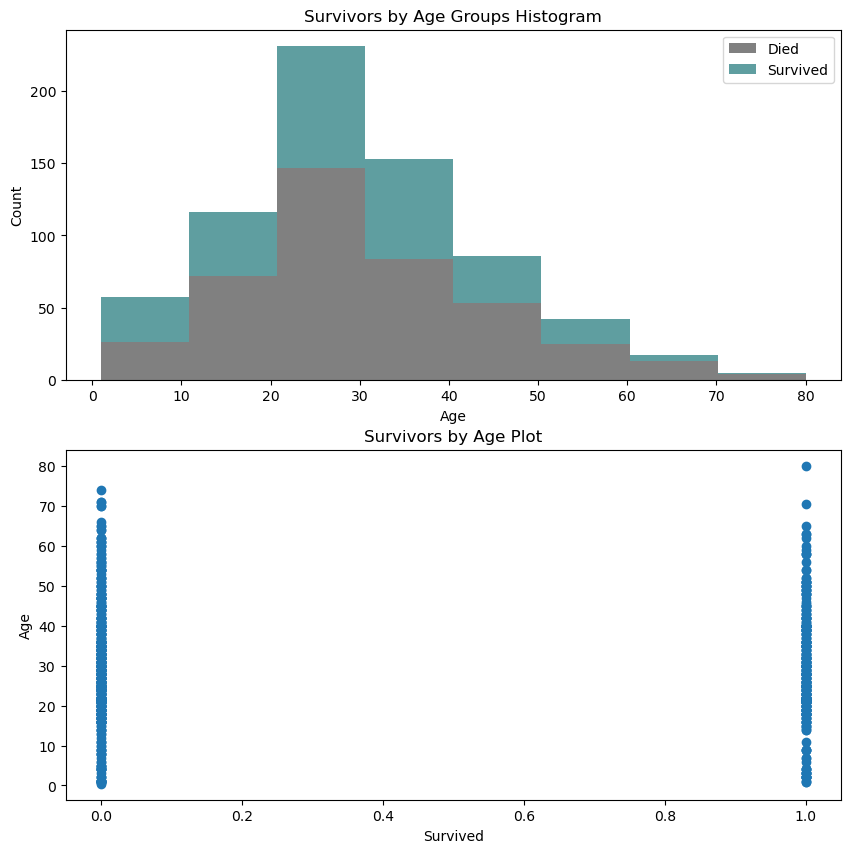

In [34]:
fig, axes = plt.subplots(2, 1, figsize=figsize_with_subplots)

df1 = df_train[df_train['Survived'] == 0]['Age']
df2 = df_train[df_train['Survived'] == 1]['Age']
max_age = max(age_fill)
axes[0].hist([df1, df2],
             bins=8,
             range=(1, max_age),
             stacked=True,
             color=['gray', 'cadetblue'])
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

axes[1].scatter(df_train['Survived'], age_fill)
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')

The above graphs aren't e